In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from scipy import stats

### Load Dataset

In [3]:
use_cols = [
    'Pclass', 'Sex', 'Age', 'Fare', 'SibSp',
    'Survived'
]

In [43]:
data = pd.read_csv(
    'https://raw.githubusercontent.com/fasthill/My-gist/main/data/titanic/train.csv', 
    usecols=use_cols)

In [44]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500


In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    data, data.Survived, test_size=0.3, random_state=2022)

In [64]:
X_train.shape, X_test.shape

((623, 6), (268, 6))

In [70]:
index = X_train['Fare'][X_train['Fare'] == 0].index
index = list(index)
index

[822, 271, 674, 302, 466, 179, 277, 815, 481, 597, 806, 263, 633]

In [71]:
xx = X_train['Fare'].copy()

In [76]:
xx.drop(index=index, axis=0, inplace=True, errors='ignore')
xx.sort_values()[-20:]

708    151.5500
332    153.4625
318    164.8667
856    164.8667
689    211.3375
779    211.3375
377    211.5000
527    221.7792
557    227.5250
380    227.5250
716    227.5250
118    247.5208
742    262.3750
311    262.3750
88     263.0000
438    263.0000
341    263.0000
258    512.3292
737    512.3292
679    512.3292
Name: Fare, dtype: float64

In [77]:
max_val = xx.max()
min_val = xx.min()
threshold = 6
mean = np.mean(xx)
std = np.std(xx)
if (mean - threshold * std) > min_val : min_val = np.round(mean - threshold * std, 2)
if (mean + threshold * std) < max_val : max_val = np.round(mean + threshold * std, 2)
z_score_outlier = [i for i in xx if np.abs((i-mean)/std) > threshold]
xx[xx < min_val] = min_val
xx[xx > max_val] = max_val
print (z_score_outlier)

[512.3292, 512.3292, 512.3292]


In [79]:
xx.sort_values()[:10], xx.sort_values()[-10:]

(378    4.0125
 326    6.2375
 843    6.4375
 371    6.4958
 202    6.4958
 654    6.7500
 143    6.7500
 411    6.8583
 825    6.9500
 129    6.9750
 Name: Fare, dtype: float64,
 716    227.5250
 118    247.5208
 742    262.3750
 311    262.3750
 88     263.0000
 438    263.0000
 341    263.0000
 258    354.9300
 737    354.9300
 679    354.9300
 Name: Fare, dtype: float64)

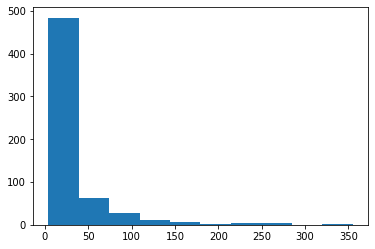

In [81]:
plt.hist(xx)
plt.show()

dataframe 사용시

In [88]:
filter = X_train['Fare'][X_train['Fare'] == 0].index
# filter = list(filter)

In [89]:
X_train.drop(index=filter, axis=0, inplace=True, errors='ignore')

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [90]:
X_train.shape

(610, 6)

In [91]:
max_val = X_train['Fare'].max()
min_val = X_train['Fare'].min()
threshold = 6
mean = np.mean(X_train['Fare'])
std = np.std(X_train['Fare'])
if (mean - threshold * std) > min_val : min_val = np.round(mean - threshold * std, 2)
if (mean + threshold * std) < max_val : max_val = np.round(mean + threshold * std, 2)
z_score_outlier = [i for i in X_train['Fare'] if np.abs((i-mean)/std) > threshold]
X_train['Fare'][X_train['Fare'] < min_val] = min_val
X_train['Fare'][X_train['Fare'] > max_val] = max_val
print (z_score_outlier)
# >> 100   (outlier)

[512.3292, 512.3292, 512.3292]


<ipython-input-91-652c038e3103>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Fare'][X_train['Fare'] < min_val] = min_val
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
<ipython-input-91-652c038e3103>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Fare'][X_train['Fare'] > max_va

In [92]:
X_train['Fare'].sort_values()[:10], X_train['Fare'].sort_values()[-10:]

(378    4.0125
 326    6.2375
 843    6.4375
 371    6.4958
 202    6.4958
 654    6.7500
 143    6.7500
 411    6.8583
 825    6.9500
 129    6.9750
 Name: Fare, dtype: float64,
 716    227.5250
 118    247.5208
 742    262.3750
 311    262.3750
 88     263.0000
 438    263.0000
 341    263.0000
 258    354.9300
 737    354.9300
 679    354.9300
 Name: Fare, dtype: float64)

In [93]:
X_train['Fare'] = np.log1p(X_train['Fare'])

<ipython-input-93-5fcdfd54e704>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Fare'] = np.log1p(X_train['Fare'])


In [94]:
X_train['Fare'].sort_values()[:10], X_train['Fare'].sort_values()[-10:]

(378    1.611935
 326    1.979276
 843    2.006535
 371    2.014343
 202    2.014343
 654    2.047693
 143    2.047693
 411    2.061570
 825    2.073172
 129    2.076312
 Name: Fare, dtype: float64,
 716    5.431646
 118    5.515527
 742    5.573579
 311    5.573579
 88     5.575949
 438    5.575949
 341    5.575949
 258    5.874734
 737    5.874734
 679    5.874734
 Name: Fare, dtype: float64)

In [95]:
test_stat, p_val = stats.shapiro(X_train['Fare'])
print('Test_statistics : {}, p_value : {}'.format(test_stat, p_val))

Test_statistics : 0.8915759325027466, p_value : 2.6499721278049318e-20


In [67]:
X_train['Fare'].drop(index=index, axis=0, inplace=True)
X_train['Fare'].sort_values()[:20]

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


263    0.0000
815    0.0000
481    0.0000
302    0.0000
674    0.0000
633    0.0000
179    0.0000
271    0.0000
806    0.0000
466    0.0000
822    0.0000
277    0.0000
597    0.0000
378    4.0125
326    6.2375
843    6.4375
202    6.4958
371    6.4958
654    6.7500
143    6.7500
Name: Fare, dtype: float64

In [57]:
X_train['Fare'].drop(index=index, axis=0, inplace=True)
max_val = X_train['Fare'].max()
min_val = X_train['Fare'].min()
threshold = 6
mean = np.mean(X_train['Fare'])
std = np.std(X_train['Fare'])
if (mean - threshold * std) > min_val : min_val = np.round(mean - threshold * std, 2)
if (mean + threshold * std) < max_val : max_val = np.round(mean + threshold * std, 2)
z_score_outlier = [i for i in X_train['Fare'] if np.abs((i-mean)/std) > threshold]
X_train['Fare'][X_train['Fare'] < min_val] = min_val
X_train['Fare'][X_train['Fare'] > max_val] = max_val
print (z_score_outlier)
# >> 100   (outlier)

[512.3292, 512.3292, 512.3292]


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-57-26a5ef6204c6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Fare'][X_train['Fare'] < min_val] = min_val
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [52]:
max_val, min_val

(314.48, 0.0)

In [58]:
X_train['Fare'].sort_values()[:20]

263    0.0000
815    0.0000
481    0.0000
302    0.0000
674    0.0000
633    0.0000
179    0.0000
271    0.0000
806    0.0000
466    0.0000
822    0.0000
277    0.0000
597    0.0000
378    4.0125
326    6.2375
843    6.4375
202    6.4958
371    6.4958
654    6.7500
143    6.7500
Name: Fare, dtype: float64

In [24]:
X_train['Fare'].loc[679]

512.3292

In [25]:
fare = X_train['Fare']

In [36]:
X_train.drop(labels=[679, 258, 737], inplace=True, errors='ignore')

In [59]:
X_train['Fare'][X_train['Fare'] == 0].index

pandas.core.indexes.numeric.Int64Index

In [61]:
X_train.drop(labels=X_train['Fare'][X_train['Fare'] == 0].index, inplace=True, errors='ignore')

In [65]:
X_train['Fare'].sort_values()[:20]

378    4.0125
326    6.2375
843    6.4375
371    6.4958
202    6.4958
654    6.7500
143    6.7500
411    6.8583
825    6.9500
129    6.9750
804    6.9750
477    7.0458
611    7.0500
210    7.0500
784    7.0500
631    7.0542
243    7.1250
433    7.1250
590    7.1250
598    7.2250
Name: Fare, dtype: float64

In [14]:
max_val = X_train['Fare'].max()
min_val = X_train['Fare'].min()
cri_cons = 3

In [15]:
std_val = X_train['Fare'].std()
mean_val = X_train['Fare'].mean()

In [16]:
[x for x in X_train['Fare'] if cri_cons < np.abs(X_train['Fare']-mean_val)/std_val]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [17]:
[x for x in X_train['Fare'] if cri_cons < np.abs(x-mean_val)/std_val]

[262.375,
 512.3292,
 227.525,
 211.5,
 247.5208,
 263.0,
 262.375,
 512.3292,
 263.0,
 211.3375,
 227.525,
 227.525,
 263.0,
 512.3292,
 221.7792,
 211.3375]

In [23]:
X_train['Fare'][X_train['Fare'] > cri_cons * std_val + mean_val] = max_val

C:\Users\User\AppData\Local\Temp\ipykernel_43852\2252912561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Fare'][X_train['Fare'] > cri_cons * std_val + mean_val] = max_val
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
cri_cons < np.abs(X_train['Fare']-mean_val)/std_val]

In [ ]:
cri_cons * std_val < np.abs(X_train['Fare']-mean_val)

In [ ]:
cri_cons * std_val + mean_val < X_train['Fare']

In [20]:
X_train['Fare'].loc[689]

211.3375

In [21]:
max_val

512.3292

In [22]:
max_val = cri_cons * std_val + mean_val
max_val

192.61139536382345

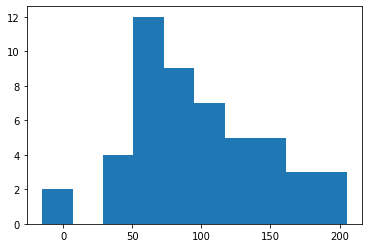

In [67]:
# histogram plot of a small sample
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate a univariate data sample
data = 50 * randn(50) + 100
# histogram
pyplot.hist(data)
pyplot.show()

In [8]:
np.round(10.124, 2)

10.12